In [7]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import mplhep as hep
from scipy.optimize import curve_fit
import pandas as pd

def gauss(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

plt.style.use(hep.style.ROOT)

In [8]:
with open('Data/May1Temp0.txt') as f:
    lines = f.read().split(',')
voltage = []
current = []
for i in range(len(lines)):
    if i%2 == 0:
        voltage.append(float(lines[i]))
    else:
        current.append(float(lines[i]))
voltage = np.array(voltage)
current = np.array(current)

with open('Data/May2Temp21.txt') as f:
    lines = f.read().split(',')
voltage1 = []
current1 = []
for i in range(len(lines)):
    if i%2 == 0:
        voltage1.append(float(lines[i]))
    else:
        current1.append(float(lines[i]))
voltage1 = np.array(voltage1)
current1 = np.array(current1)

with open('Data/May3Temp60.txt') as f:
    lines = f.read().split(',')
voltage2 = []
current2 = []
for i in range(len(lines)):
    if i%2 == 0:
        voltage2.append(float(lines[i]))
    else:
        current2.append(float(lines[i]))
voltage2 = np.array(voltage2)
current2 = np.array(current2)

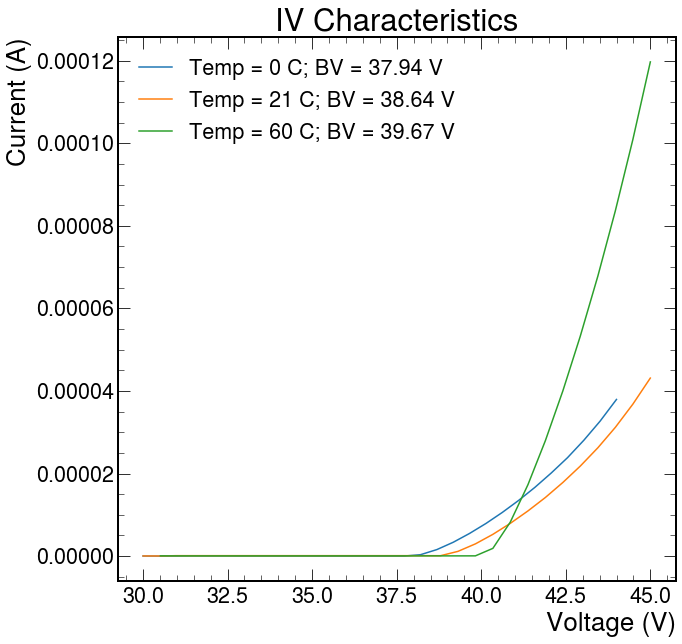

In [14]:
plt.title('IV Characteristics')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')

BV = []

p1 = np.polyfit(voltage[16:], current[16:], 2)
p2 = np.polyfit(voltage[:16], current[:16], 1)
a = p1[0]
b = p1[1] - p2[0]
c = p1[2] - p2[1]
plt.plot(voltage,current,label=f"Temp = 0 C; BV = {(-b+np.sqrt(b**2-4*a*c))/(2*a):.2f} V")
BV.append((-b+np.sqrt(b**2-4*a*c))/(2*a))

p11 = np.polyfit(voltage1[16:], current1[16:], 2)
p21 = np.polyfit(voltage1[:16], current1[:16], 1)
a1 = p11[0]
b1 = p11[1] - p21[0]
c1 = p11[2] - p21[1]
plt.plot(voltage1,current1,label=f"Temp = 21 C; BV = {(-b1+np.sqrt(b1**2-4*a1*c1))/(2*a1):.2f} V")
BV.append((-b1+np.sqrt(b1**2-4*a1*c1))/(2*a1))

p12 = np.polyfit(voltage2[16:], current2[16:], 2)
p22 = np.polyfit(voltage2[1:16], current2[1:16], 1)
a2 = p12[0]
b2 = p12[1] - p22[0]
c2 = p12[2] - p22[1]
plt.plot(voltage2[1:],current2[1:],label=f"Temp = 60 C; BV = {(-b2+np.sqrt(b2**2-4*a2*c2))/(2*a2):.2f} V")
BV.append((-b2+np.sqrt(b2**2-4*a2*c2))/(2*a2))

plt.legend()
plt.show()

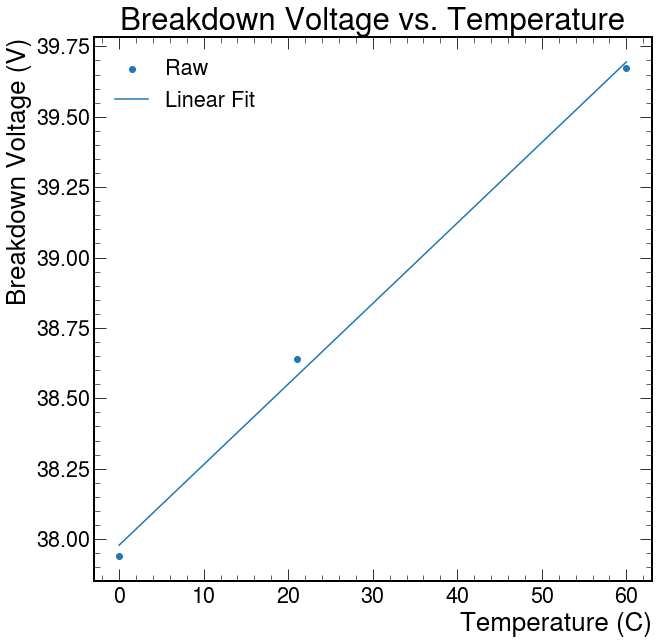

In [22]:
plt.title("Breakdown Voltage vs. Temperature")
plt.xlabel("Temperature (C)")
plt.ylabel("Breakdown Voltage (V)")

temp = np.array([0, 21, 60])

plt.scatter(temp,BV,label="Raw")
p = np.polyfit(temp,BV,1)
plt.plot(temp,temp*p[0]+p[1],label="Linear Fit")
plt.legend()
plt.show()